# Product Propensity - Default Features
* StelllarAlgo Data Science
* Ryan Kazmerik, Nakisa Rad, Joey Lai
* Jul 6, 2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pycaret.classification import *

## Step 1 : Generate Datasets

### Let's convert our training dataset into a dataframe and check the shape:

In [2]:
df = pd.read_parquet("./data/training/preprocessing_input")

print(df.shape)
df.info()

(14143, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14143 entries, 0 to 14142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dimCustomerMasterId  14143 non-null  int64  
 1   distance             14143 non-null  float64
 2   seasonYear           14143 non-null  int64  
 3   events_prior         14143 non-null  int64  
 4   attended_prior       14143 non-null  int64  
 5   events_last          14143 non-null  int64  
 6   attended_last        14143 non-null  int64  
 7   tenure               14143 non-null  int64  
 8   atp_last             14143 non-null  float64
 9   product_current      14143 non-null  object 
 10  product_last         14143 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.2+ MB


In [3]:
df.head()

,dimCustomerMasterId,distance,seasonYear,events_prior,attended_prior,events_last,attended_last,tenure,atp_last,product_current,product_last
0,109,61.49,2021,13,13,13,13,0,0.0,None,None
1,171,37.83,2021,13,13,13,13,0,0.0,None,None
2,178,12.75,2021,13,13,13,13,0,0.0,Full Season,None
3,207,69.88,2021,13,13,13,13,0,0.0,Full Season,None
4,218,48.37,2021,13,13,13,13,0,0.0,None,None


### Let's specify the features we would like to use to train our model:

In [4]:
# copy your main dataframe
df_dataset = df

df_train = df_dataset.sample(frac=0.85, random_state=786)
df_eval = df_dataset.drop(df_train.index)

df_train.reset_index(drop=True, inplace=True)
df_eval.reset_index(drop=True, inplace=True)

# print out the number of records for training and eval
print('Data for Modeling: ' + str(df_train.shape))
print('Unseen Data For Predictions: ' + str(df_eval.shape), end="\n\n")

Data for Modeling: (12022, 11)
Unseen Data For Predictions: (2121, 11)



## Step 2: Create Model

### Now we can model the data using a multiclass classifier to predict probabilities that a fan will purchase each product offered by the team:

In [5]:
setup(
    data= df_train, 
    target="product_current", 
    train_size = 0.85,
    data_split_shuffle=True,
    silent=True,
    verbose=False,
    ignore_features=[
        "dimCustomerMasterId",
        "seasonYear"
    ],
    numeric_features=[
        "atp_last",
        "attended_last",
        "attended_prior",
        "events_last",
        "events_prior",
        "distance",
        "tenure" 
    ]
);

### The evaluation output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1 and Kappa accross the folds (10 by default) along with training time:

In [6]:
model_matrix = compare_models(
    fold= 10,
    include= ["rf"]
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8153,0.8138,0.4489,0.8161,0.8152,0.6303,0.6308,0.9140


### Let's grab the model and finalize it over 10-fold validation:

In [7]:
best_model = create_model(model_matrix);
final_model = finalize_model(best_model);

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8278,0.9182,0.4390,0.8259,0.8261,0.6494,0.6499
1,0.8053,0.8935,0.4232,0.8021,0.8032,0.6054,0.6057
2,0.8102,0.8916,0.4324,0.8090,0.8096,0.6171,0.6171
3,0.8033,0.8906,0.4376,0.8092,0.8056,0.6127,0.6136
4,0.8063,0.9055,0.4288,0.8084,0.8069,0.6142,0.6147
5,0.8337,0.9199,0.4564,0.8337,0.8335,0.6675,0.6676
6,0.8307,0.0000,0.5593,0.8297,0.8299,0.6593,0.6595
7,0.8004,0.8863,0.4210,0.7973,0.7985,0.5949,0.5952
8,0.8168,0.9136,0.4525,0.8256,0.8197,0.6434,0.6454
9,0.8188,0.9186,0.4391,0.8205,0.8192,0.6390,0.6395


/opt/miniconda3/envs/stellar/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/stellar/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/stellar/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/stellar/lib/python3.8/site-pack

## Step 3 : Evaluate Model

### The correlation matrix shows us attributes that are statistically correlated with the target variable:

In [8]:
cor = df.corr()

df_correlated = df

corr = df_correlated.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,dimCustomerMasterId,distance,seasonYear,events_prior,attended_prior,events_last,attended_last,tenure,atp_last
dimCustomerMasterId,1.00,0.08,0.06,-0.12,-0.10,-0.13,-0.09,-0.06,0.03
distance,0.08,1.00,0.06,-0.09,-0.09,-0.09,-0.09,-0.06,0.07
seasonYear,0.06,0.06,1.00,-0.16,-0.28,-0.45,-0.66,0.30,0.46
events_prior,-0.12,-0.09,-0.16,1.00,0.97,0.88,0.74,0.72,-0.04
attended_prior,-0.10,-0.09,-0.28,0.97,1.00,0.86,0.81,0.69,-0.13
events_last,-0.13,-0.09,-0.45,0.88,0.86,1.00,0.92,0.34,-0.09
attended_last,-0.09,-0.09,-0.66,0.74,0.81,0.92,1.00,0.18,-0.23
tenure,-0.06,-0.06,0.30,0.72,0.69,0.34,0.18,1.00,0.01
atp_last,0.03,0.07,0.46,-0.04,-0.13,-0.09,-0.23,0.01,1.00


### We can have a look at the most important features that determine a correct prediction by the model:

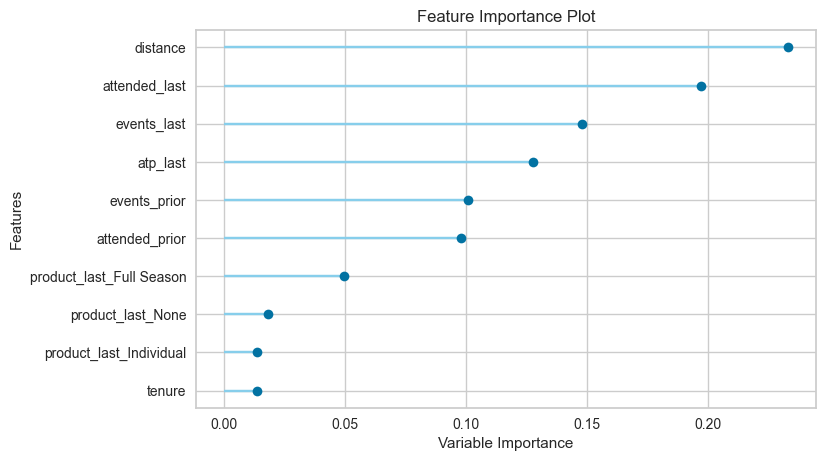

In [9]:
plot_model(final_model, plot='feature')

### Let's also look at the confusion matrix for hits and misses:

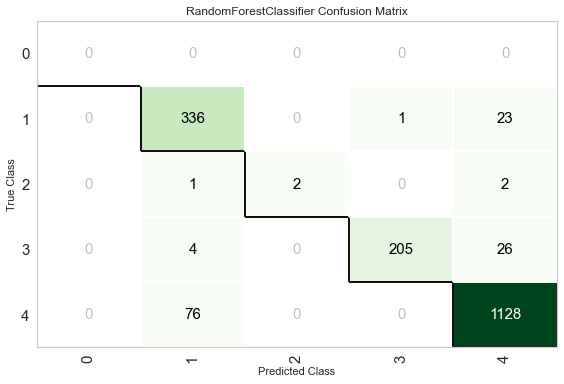

In [10]:
plot_model(final_model, plot="confusion_matrix")

### Let's save our model for future use:

In [12]:
save_model(final_model, "./models/intermiami-productpropensity(Jul6-2022).pkl")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['dimCustomerMasterId',
                                                        'seasonYear'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['atp_last',
                                                           'attended_last',
                                                           'attended_prior',
                                                           'events_last',
                                                           'events_prior',
                                                           'distance',
                                                           'tenure'],
                                       

### Let's load in our 2022 season data and get product propensity probabilities using the model:

In [14]:
df_inference = pd.read_parquet("./data/inference/preprocessing_input/")
df_inference.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15190 entries, 0 to 29332
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dimCustomerMasterId  15190 non-null  int64  
 1   distance             15190 non-null  float64
 2   seasonYear           15190 non-null  int64  
 3   events_prior         15190 non-null  int64  
 4   attended_prior       15190 non-null  int64  
 5   events_last          15190 non-null  int64  
 6   attended_last        15190 non-null  int64  
 7   tenure               15190 non-null  int64  
 8   atp_last             15190 non-null  float64
 9   product_current      15190 non-null  object 
 10  product_last         15190 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


In [23]:
saved_model = load_model("./models/intermiami-productpropensity(Jul6-2022).pkl")

df_predictions = predict_model(saved_model, data=df_inference)
df_predictions.head()

Transformation Pipeline and Model Successfully Loaded


,dimCustomerMasterId,distance,seasonYear,events_prior,attended_prior,events_last,attended_last,tenure,atp_last,product_current,product_last,Label,Score
0,7,62.69,2023,1,1,1,1,0,33.0,None,Individual,None,0.9937
1,24,10.70,2023,1,0,1,0,0,80.0,None,Individual,None,0.9900
3,28,70.42,2023,1,0,0,0,1,0.0,None,None,None,1.0000
5,36,82.62,2023,1,1,0,0,1,0.0,None,None,None,1.0000
7,40,196.93,2023,1,0,0,0,1,0.0,None,None,None,0.9972


### Now we can see the count for each products in the inference data:

In [24]:
counts = df_predictions.Label.value_counts()
counts

None           14181
Individual       789
Full Season      215
Half Season        5
Name: Label, dtype: int64

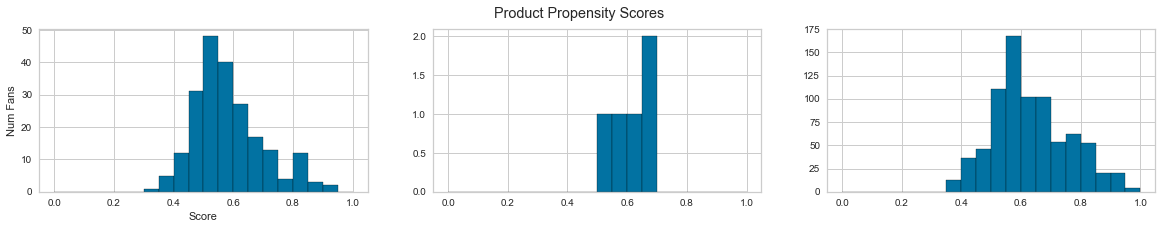

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,3))

fig.suptitle("Product Propensity Scores")

ax1.hist(df_predictions[df_predictions.Label == "Full Season"].Score, bins=20,  edgecolor="black", range=(0,1))
ax2.hist(df_predictions[df_predictions.Label == "Half Season"].Score, bins=20, edgecolor="black", range=(0,1))
ax3.hist(df_predictions[df_predictions.Label == "Individual"].Score, bins=20, edgecolor="black", range=(0,1))

ax1.set_xlabel('Score')
ax1.set_ylabel('Num Fans')

plt.show()

### Let's export these scores to csv for further analysis:

In [26]:
df_predictions.to_csv("./results/InterMiami_ProductPropensity_Scores_2022-07-06.csv")


### Done